In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix

# from credentials import *
# from utils import functions as f

In [55]:
# Load clean df
df = pd.read_csv("../data/dataset.csv")

In [57]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [25]:
# df['mode'] = df['mode'].map({'major': 0, 'minor': 1})
# df['mode'] = df['mode'].astype(float)

In [58]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

None

In [18]:
df.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,...,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06,1.853311e+06
mean,2.332751e+02,2.009259e+03,9.557489e+01,3.469483e-01,4.617319e-01,4.791076e-01,5.564984e-01,7.848231e+00,5.920562e-01,9.934434e-01,...,3.873969e+00,4.815779e-01,-1.043758e-01,1.544666e-02,5.953267e-02,5.321750e-02,2.276128e-02,7.696181e-04,-2.482889e-02,-1.454615e-03
std,1.086198e+02,1.103782e+01,2.735883e+00,3.426890e-01,1.717286e-01,1.989990e-01,1.858682e-01,2.679272e+00,2.602121e-01,5.522579e-02,...,4.859001e-01,2.724881e-01,4.323172e-01,3.607482e-01,2.803449e-01,3.822637e-01,4.107625e-01,2.117887e-01,3.743991e-01,3.872072e-01
min,3.000095e+01,1.950000e+03,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.163774e+00,-1.171400e+00,-8.858698e-01,-8.994451e-01,-1.081056e+00,-1.055477e+00,-8.022487e-01,-1.178501e+00
25%,1.768273e+02,2.006000e+03,9.338338e+01,2.661495e-02,3.316267e-01,3.207484e-01,4.327063e-01,5.823167e+00,4.100748e-01,9.691058e-01,...,4.000000e+00,2.522356e-01,-4.082216e-01,-1.760900e-01,-1.470539e-01,-2.350117e-01,-3.121311e-01,-9.005713e-02,-3.157318e-01,-2.703560e-01
50%,2.178956e+02,2.013000e+03,9.575712e+01,2.202808e-01,4.592793e-01,4.794221e-01,5.725539e-01,7.518892e+00,6.264951e-01,1.002416e+00,...,4.000000e+00,4.736272e-01,-3.985430e-02,8.452337e-02,1.289347e-01,6.218451e-02,-1.688186e-02,4.288397e-02,-9.843637e-02,-3.869237e-03
75%,2.671304e+02,2.017000e+03,9.792292e+01,6.529128e-01,5.852491e-01,6.340019e-01,6.975461e-01,9.476678e+00,8.074375e-01,1.029135e+00,...,4.000000e+00,7.052386e-01,1.916600e-01,2.833644e-01,2.745741e-01,2.833329e-01,3.725263e-01,1.477068e-01,2.060100e-01,2.219634e-01
max,1.799815e+03,2.018000e+03,1.000000e+02,9.957964e-01,9.999525e-01,9.850921e-01,9.978067e-01,5.119650e+01,9.999825e-01,1.167801e+00,...,5.000000e+00,9.999900e-01,1.000457e+00,8.624035e-01,6.395299e-01,1.202647e+00,1.000955e+00,4.130149e-01,1.092165e+00,1.204228e+00


In [59]:
selected_features = ['energy','danceability','mode', 'speechiness', 'tempo', 'acousticness', 'instrumentalness', 'valence']

# Create X df with selected features
X = df[selected_features]
X

,energy,danceability,mode,speechiness,tempo,acousticness,instrumentalness,valence
0,0.4610,0.676,0,0.1430,87.917,0.0322,0.000001,0.7150
1,0.1660,0.420,1,0.0763,77.489,0.9240,0.000006,0.2670
2,0.3590,0.438,1,0.0557,76.332,0.2100,0.000000,0.1200
3,0.0596,0.266,1,0.0363,181.740,0.9050,0.000071,0.1430
4,0.4430,0.618,1,0.0526,119.949,0.4690,0.000000,0.1670
...,...,...,...,...,...,...,...,...
113995,0.2350,0.172,1,0.0422,125.995,0.6400,0.928000,0.0339
113996,0.1170,0.174,0,0.0401,85.239,0.9940,0.976000,0.0350
113997,0.3290,0.629,0,0.0420,132.378,0.8670,0.000000,0.7430
113998,0.5060,0.587,1,0.0297,135.960,0.3810,0.000000,0.4130


In [60]:
# Select scaler
scaler = StandardScaler()

# Fit scaler
scaler.fit(X)

# Transform dataset
X_scaled = scaler.transform(X)

# Save scaler
file_name = "../scalers/scaler1.pkl" # Path with filename
with open(file_name, 'wb') as f:
    pickle.dump(scaler, f)


# Convert numpy array into pandas dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# Show transformed df
display(X_scaled_df.describe())

,energy,danceability,mode,speechiness,tempo,acousticness,instrumentalness,valence
count,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05,1.140000e+05
mean,2.333572e-16,-8.875551e-16,-3.989012e-17,-1.316374e-16,-2.792308e-17,2.632748e-16,1.994506e-18,-5.584617e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.549946e+00,-3.266080e+00,-1.326281e+00,-8.006298e-01,-4.074574e+00,-9.470374e-01,-5.041119e-01,-1.828544e+00
25%,-6.734152e-01,-6.384647e-01,-1.326281e+00,-4.610918e-01,-7.648621e-01,-8.962136e-01,-5.041119e-01,-8.256896e-01
50%,1.734091e-01,7.606216e-02,7.539880e-01,-3.381393e-01,-4.364434e-03,-4.387992e-01,-5.039775e-01,-3.883451e-02
75%,8.453026e-01,7.387282e-01,7.539880e-01,-1.438660e-03,5.978759e-01,8.513439e-01,-3.458194e-01,8.058776e-01
max,1.425755e+00,2.409799e+00,7.539880e-01,8.326228e+00,4.043762e+00,2.048260e+00,2.726348e+00,2.009303e+00


In [61]:
X_scaled_df

,energy,danceability,mode,speechiness,tempo,acousticness,instrumentalness,valence
0,-0.717148,0.629244,-1.326281,0.551848,-1.141863,-0.850202,-0.504109,0.929306
1,-1.889980,-0.845908,0.753988,-0.078993,-1.489717,1.831732,-0.504094,-0.798690
2,-1.122669,-0.742186,0.753988,-0.273826,-1.528312,-0.315499,-0.504112,-1.365688
3,-2.312994,-1.733304,0.753988,-0.457309,1.987859,1.774593,-0.503883,-1.276974
4,-0.788711,0.295030,0.753988,-0.303145,-0.073348,0.463399,-0.504112,-1.184403
...,...,...,...,...,...,...,...,...
113995,-1.615656,-2.274962,0.753988,-0.401507,0.128333,0.977652,2.493755,-1.697787
113996,-2.084789,-2.263437,-1.326281,-0.421369,-1.231195,2.042245,2.648817,-1.693545
113997,-1.241940,0.358416,-1.326281,-0.403399,0.341255,1.660315,-0.504112,1.037306
113998,-0.538241,0.116398,0.753988,-0.519731,0.460742,0.198754,-0.504112,-0.235548


In [62]:
K = range(2, 30)

inertia = []
silhouette = []

for k in K:

    # Create KMeans model
    kmeans = KMeans(n_init='auto',
                    n_clusters=k,
                    random_state=42,
                    #verbose=1
                   )
    
    # Train model
    kmeans.fit(X_scaled_df)
    
    # Save model

  # Path with filename

# Open the file in binary write mode and dump the KMeans model object
    
    file_name = '../clustermodels1/kmeans_{}.pkl'.format(str(k))
    with open(file_name, 'wb') as f:
        pickle.dump(kmeans, f)

    # Append inertia and silhouette
    inertia.append(kmeans.inertia_)
    print("Epoch done")
  


Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done
Epoch done


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

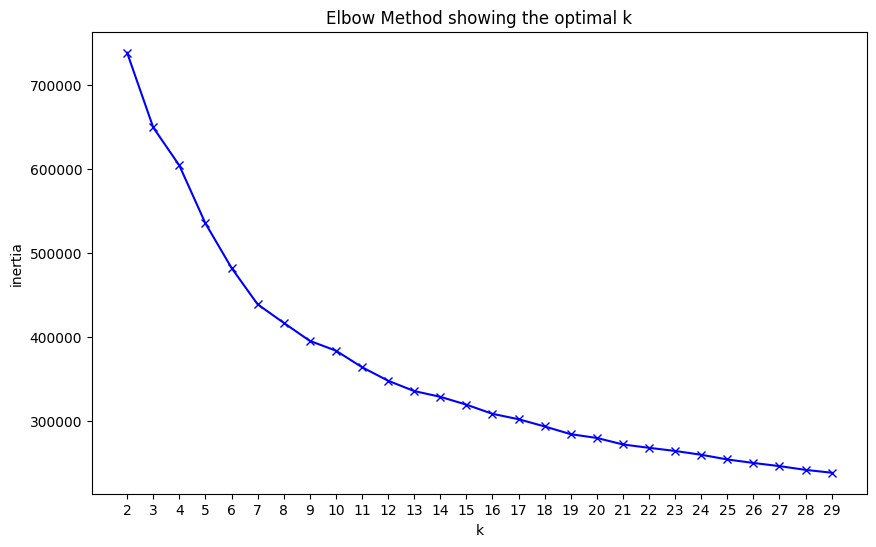

In [63]:
# Plot inertia and silhouette to select best model
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [65]:
filename = "../clustermodels1/kmeans_8.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

model

KMeans(random_state=42)

In [66]:
clusters = model.predict(X_scaled_df[selected_features])

In [67]:
clustered_df = df.copy()
clustered_df['cluster'] = clusters

In [68]:
clustered_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,2


In [69]:
display(clustered_df['cluster'].value_counts())

cluster
1    22611
3    22558
2    18499
0    14714
5    13953
6    11134
7     7453
4     3078
Name: count, dtype: int64

In [70]:
clustered_df.to_csv('../data/clustered_dataset1.csv',index = False,) 